In [13]:
TXdt = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

---
# 1. Extração
---

In [14]:
# Importando bibliotecas para leitura e plotagem
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Primeira leitura dos dados
TXdt_view = pd.read_json(TXdt)
TXdt_view.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [16]:
# Normalizando DataFrame do Telecom X
# Necessário normalizar uma a uma e juntar todas.
TXdt_norm_customer = pd.json_normalize(TXdt_view['customer'])
TXdt_norm_phone = pd.json_normalize(TXdt_view['phone'])
TXdt_norm_internet = pd.json_normalize(TXdt_view['internet'])
TXdt_norm_account = pd.json_normalize(TXdt_view['account'])

# Concatenando todos os normalize + colunas de interesse do df geral
TXdt_fully_norm = pd.concat([TXdt_view['customerID'], TXdt_view['Churn'], TXdt_norm_customer, TXdt_norm_phone, TXdt_norm_internet, TXdt_norm_account], axis=1)
TXdt_fully_norm.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


---
# 2. Transformação
---

In [17]:
# Converto todas as colunas e seu conteúdo para lower case para padronizar os dados
TXdt_fully_norm.columns = TXdt_fully_norm.columns.str.lower()
TXdt_fully_norm = TXdt_fully_norm.applymap(lambda s: s.lower() if type(s) == str else s)


# Removo todas as linhas que, em alguma coluna, apresentam nulo ou vazio
TXdt_fully_norm.dropna(inplace=True)

# CONVERTO AS COLUNAS PARA O TIPO CERTO DE DADOS
# customerid para string
TXdt_fully_norm['customerid'] = TXdt_fully_norm['customerid'].astype(str)

# churn para boolean
TXdt_fully_norm['churn'] = TXdt_fully_norm['churn'].astype(bool)

# gender para string
TXdt_fully_norm['gender'] = TXdt_fully_norm['gender'].astype(str)

# seniorcitizen para boolean
TXdt_fully_norm['seniorcitizen'] = TXdt_fully_norm['seniorcitizen'].astype(bool)

# partner para boolean
TXdt_fully_norm['partner'] = TXdt_fully_norm['partner'].astype(bool)

# dependents para boolean
TXdt_fully_norm['dependents'] = TXdt_fully_norm['dependents'].astype(bool)

# tenure para integer
TXdt_fully_norm['tenure'] = TXdt_fully_norm['tenure'].astype(int)

# phoneservice para boolean
TXdt_fully_norm['phoneservice'] = TXdt_fully_norm['phoneservice'].astype(bool)

# multiplelines para boolean
TXdt_fully_norm['multiplelines'] = TXdt_fully_norm['multiplelines'].astype(bool)

# internetservice para boolean
TXdt_fully_norm['internetservice'] = TXdt_fully_norm['internetservice'].astype(bool)

# onlinesecurity para boolean
TXdt_fully_norm['onlinesecurity'] = TXdt_fully_norm['onlinesecurity'].astype(bool)

# onlinebackup para boolean
TXdt_fully_norm['onlinebackup'] = TXdt_fully_norm['onlinebackup'].astype(bool)

# deviceprotection para boolean
TXdt_fully_norm['deviceprotection'] = TXdt_fully_norm['deviceprotection'].astype(bool)

# techsupport para boolean
TXdt_fully_norm['techsupport'] = TXdt_fully_norm['techsupport'].astype(bool)

# streamingtv para boolean
TXdt_fully_norm['streamingtv'] = TXdt_fully_norm['streamingtv'].astype(bool)

# streamingmovies para boolean
TXdt_fully_norm['streamingmovies'] = TXdt_fully_norm['streamingmovies'].astype(bool)

# contract para string
TXdt_fully_norm['contract'] = TXdt_fully_norm['contract'].astype(str)

# paperlessbilling para boolean
TXdt_fully_norm['paperlessbilling'] = TXdt_fully_norm['paperlessbilling'].astype(bool)

# paymentmethod para string
TXdt_fully_norm['paymentmethod'] = TXdt_fully_norm['paymentmethod'].astype(str)

# monthlycharges para float
TXdt_fully_norm['charges.monthly'] = TXdt_fully_norm['charges.monthly'].astype(float)


# Sabendo que há valores vazios na coluna (que deram problema antes), converto para nulo para analizar normalmente
TXdt_fully_norm.loc[TXdt_fully_norm['charges.total'] == ' ', 'charges.total'] = 0.0
# totalcharges para float, tratando valores vazios
TXdt_fully_norm['charges.total'] = TXdt_fully_norm['charges.total'].astype(float)


# Verificando resultados
TXdt_fully_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   bool   
 4   partner           7267 non-null   bool   
 5   dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   bool   
 8   multiplelines     7267 non-null   bool   
 9   internetservice   7267 non-null   bool   
 10  onlinesecurity    7267 non-null   bool   
 11  onlinebackup      7267 non-null   bool   
 12  deviceprotection  7267 non-null   bool   
 13  techsupport       7267 non-null   bool   
 14  streamingtv       7267 non-null   bool   
 15  streamingmovies   7267 non-null   bool   
 16  contract          7267 non-null   object 


In [18]:
# Crio uma variável com apenas linhas Churn=True
TXdt_fully_norm_churn = TXdt_fully_norm[TXdt_fully_norm['churn'] == True]

---
# 3. Carga e Análise
---

In [19]:
# Calculo média, mediana e desvio padrão
TXdt_fully_norm.describe()

,tenure,charges.monthly,charges.total
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035
std,24.571773,30.129572,2268.648587
min,0.000000,18.250000,0.000000
25%,9.000000,35.425000,396.200000
50%,29.000000,70.300000,1389.200000
75%,55.000000,89.875000,3778.525000
max,72.000000,118.750000,8684.800000


In [20]:
# Crio uma variável com todas as colunas tipo booleano
TXdt_fully_norm_churn_bool = TXdt_fully_norm_churn.select_dtypes(bool)

# Comparo churn com cada coluna booleana
for col in TXdt_fully_norm_churn_bool.columns:
    print('')
    print(TXdt_fully_norm_churn.groupby(['churn', col]).size()*100/len(TXdt_fully_norm_churn))
    print('')


churn  churn
True   True     100.0
dtype: float64


churn  seniorcitizen
True   False            83.785319
       True             16.214681
dtype: float64


churn  partner
True   True       100.0
dtype: float64


churn  dependents
True   True          100.0
dtype: float64


churn  phoneservice
True   True            100.0
dtype: float64


churn  multiplelines
True   True             100.0
dtype: float64


churn  internetservice
True   True               100.0
dtype: float64


churn  onlinesecurity
True   True              100.0
dtype: float64


churn  onlinebackup
True   True            100.0
dtype: float64


churn  deviceprotection
True   True                100.0
dtype: float64


churn  techsupport
True   True           100.0
dtype: float64


churn  streamingtv
True   True           100.0
dtype: float64


churn  streamingmovies
True   True               100.0
dtype: float64


churn  paperlessbilling
True   True                100.0
dtype: float64



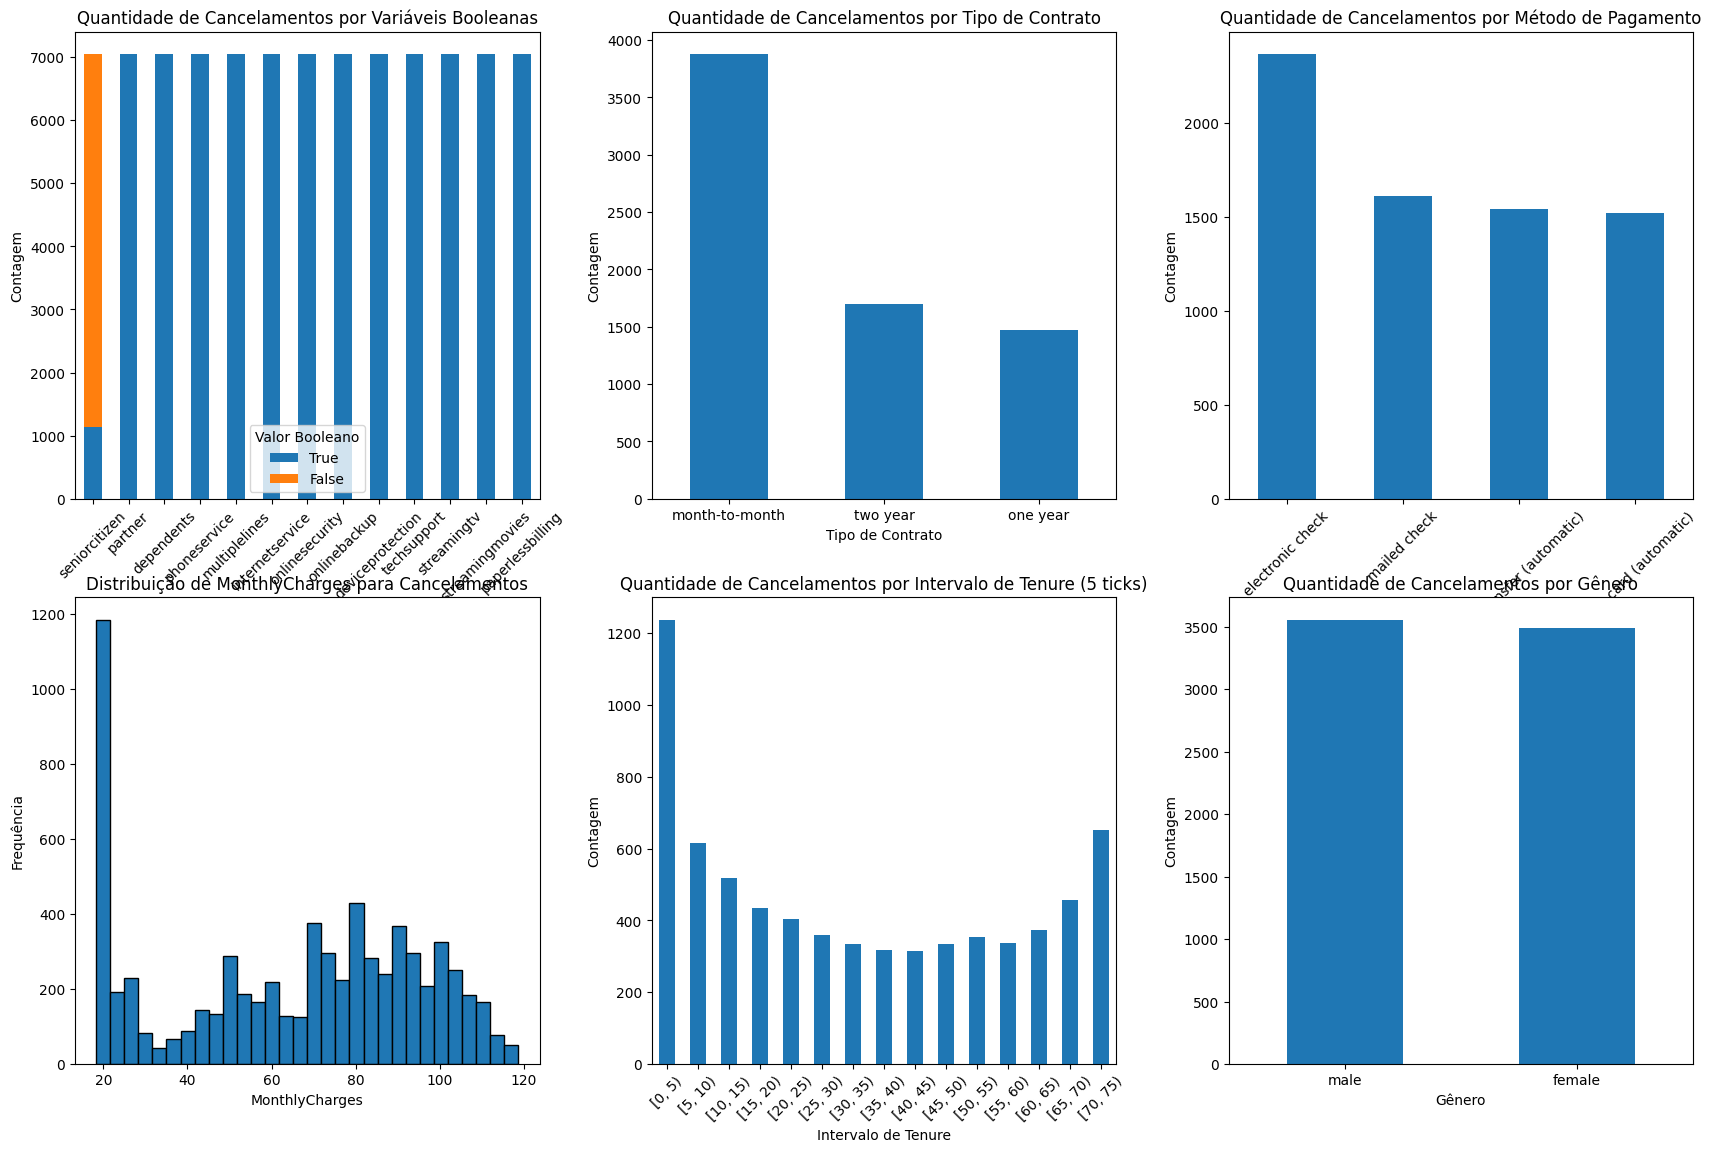

In [21]:
# Configurando o subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.tight_layout(pad=5.0)

# Gráfico 1: Cancelamentos por colunas booleanas
boolean_cols = TXdt_fully_norm.select_dtypes(include='bool').columns.tolist()
boolean_cols.remove('churn') # Exclui 'churn' para não comparar com ele mesmo

churn_counts_bool = {}
for col in boolean_cols:
    churn_counts_bool[col] = TXdt_fully_norm_churn[col].value_counts()

ax1 = axes[0, 0]
df_bool_counts = pd.DataFrame(churn_counts_bool).T.fillna(0)
df_bool_counts = df_bool_counts.rename(columns={True: 'True', False: 'False'})
df_bool_counts[['True', 'False']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Quantidade de Cancelamentos por Variáveis Booleanas')
ax1.set_ylabel('Contagem')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Valor Booleano')


# Gráfico 2: Cancelamentos por Contract
ax2 = axes[0, 1]
churn_by_contract = TXdt_fully_norm_churn['contract'].value_counts()
churn_by_contract.plot(kind='bar', ax=ax2)
ax2.set_title('Quantidade de Cancelamentos por Tipo de Contrato')
ax2.set_xlabel('Tipo de Contrato')
ax2.set_ylabel('Contagem')
ax2.tick_params(axis='x', rotation=0)


# Gráfico 3: Cancelamentos por PaymentMethod
ax3 = axes[0, 2]
churn_by_paymentmethod = TXdt_fully_norm_churn['paymentmethod'].value_counts()
churn_by_paymentmethod.plot(kind='bar', ax=ax3)
ax3.set_title('Quantidade de Cancelamentos por Método de Pagamento')
ax3.set_xlabel('Método de Pagamento')
ax3.set_ylabel('Contagem')
ax3.tick_params(axis='x', rotation=45)


# Gráfico 4: Cancelamentos por MonthlyCharges (usando um histograma para distribuição)
ax4 = axes[1, 0]
ax4.hist(TXdt_fully_norm_churn['charges.monthly'], bins=30, edgecolor='black')
ax4.set_title('Distribuição de MonthlyCharges para Cancelamentos')
ax4.set_xlabel('MonthlyCharges')
ax4.set_ylabel('Frequência')


# Gráfico 5: Cancelamentos por Tenure (com intervalos de 5)
ax5 = axes[1, 1]
bins = range(0, TXdt_fully_norm_churn['tenure'].max() + 6, 5)
tenure_bins = pd.cut(TXdt_fully_norm_churn['tenure'], bins=bins, right=False)
churn_by_tenure_interval = tenure_bins.value_counts().sort_index()
churn_by_tenure_interval.plot(kind='bar', ax=ax5)
ax5.set_title('Quantidade de Cancelamentos por Intervalo de Tenure (5 ticks)')
ax5.set_xlabel('Intervalo de Tenure')
ax5.set_ylabel('Contagem')
ax5.tick_params(axis='x', rotation=45)


# Gráfico 6: Cancelamentos por Gender
ax6 = axes[1, 2]
churn_by_gender = TXdt_fully_norm_churn['gender'].value_counts()
churn_by_gender.plot(kind='bar', ax=ax6)
ax6.set_title('Quantidade de Cancelamentos por Gênero')
ax6.set_xlabel('Gênero')
ax6.set_ylabel('Contagem')
ax6.tick_params(axis='x', rotation=0)


plt.show()


In [22]:
TXdt_fully_norm_churn.describe()

,tenure,charges.monthly,charges.total
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Média de Monthly Charges por Percentil de Tenure:
  tenure_percentile  avg_monthly_charges
0      0.0% - 25.0%            55.229301
1     25.0% - 50.0%            61.186925
2     50.0% - 75.0%            67.245314
3    75.0% - 100.0%            74.826518


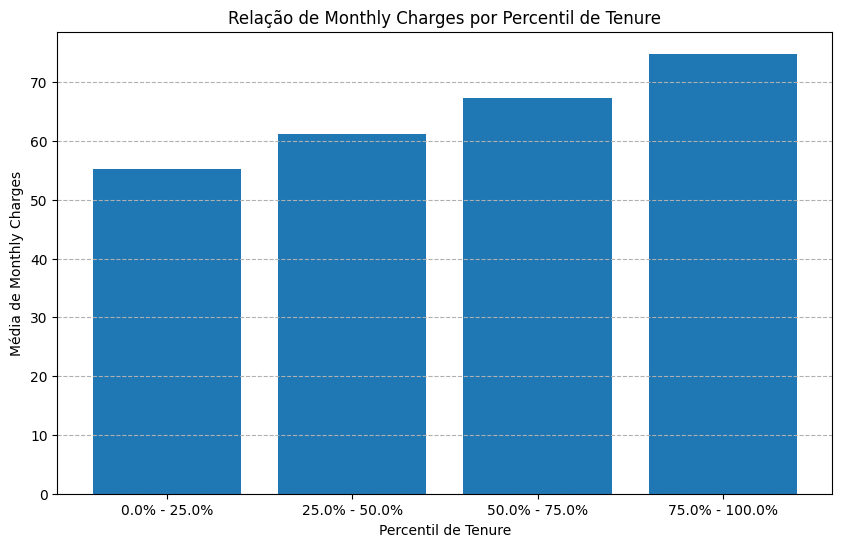

In [23]:
# Calcula os percentis da coluna 'tenure'
tenure_percentiles = TXdt_fully_norm['tenure'].quantile([0, 0.25, 0.5, 0.75, 1])

# Cria um DataFrame para armazenar a média de charges.monthly para cada intervalo de tenure
monthly_charges_by_tenure_percentile = pd.DataFrame(columns=['tenure_percentile', 'avg_monthly_charges'])

# Calcula a média de charges.monthly para cada intervalo de tenure definido pelos percentis
for i in range(len(tenure_percentiles) - 1):
    lower_bound = tenure_percentiles.iloc[i]
    upper_bound = tenure_percentiles.iloc[i + 1]

    # Filtra o DataFrame para o intervalo de tenure atual
    if i < len(tenure_percentiles) - 2: # Para todos exceto o último intervalo
        filtered_df = TXdt_fully_norm[(TXdt_fully_norm['tenure'] >= lower_bound) & (TXdt_fully_norm['tenure'] < upper_bound)]
    else: # Para o último intervalo (inclui o valor máximo)
        filtered_df = TXdt_fully_norm[(TXdt_fully_norm['tenure'] >= lower_bound) & (TXdt_fully_norm['tenure'] <= upper_bound)]

    # Calcula a média de charges.monthly no intervalo
    avg_charges = filtered_df['charges.monthly'].mean()

    # Adiciona ao DataFrame de resultados
    monthly_charges_by_tenure_percentile.loc[i] = [f'{tenure_percentiles.index[i]*100}% - {tenure_percentiles.index[i+1]*100}%', avg_charges]

print("Média de Monthly Charges por Percentil de Tenure:")
print(monthly_charges_by_tenure_percentile)

# Plota o gráfico
plt.figure(figsize=(10, 6))
plt.bar(monthly_charges_by_tenure_percentile['tenure_percentile'], monthly_charges_by_tenure_percentile['avg_monthly_charges'])
plt.title('Relação de Monthly Charges por Percentil de Tenure')
plt.xlabel('Percentil de Tenure')
plt.ylabel('Média de Monthly Charges')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

---
# 4. Relatório Final
---
## Introdução
 **Este relatório tem como objetivo apresentar o resultado da análise dos dados de clientes da Telecom X feita com o intuiti de descobrir o motivo da alta evasão de clientes da empresa.**

---
### Limpeza dos Dados
* Para importar os dados, foi criada uma variável com o link raw do json file encontrado no GitHub.
* Pandas e matplotlib foram importados para análise dos dados
* Uma variável de leitura de arquivos json foi criada.
* Foi preciso normalizar cada coluna concatenada dentro do arquivo json e somá-las a às que já estavam normais para criar um dataframe organizado.
* Cada coluna, antes object, foi convertida para o formato devido, algumas boolean, outras float, etc.
* Antes de converter Charges.Total foi preciso substitui os vazios por 0.0, já que impediam uma conversão normal.
* Ao fim, cria-se uma versão do data frame que possui apenas os valores Churn=True, ou seja, apenas os clientes que cancelaram o serviço.
---
### Análise Exploratória
* No início, usamos uma longa lista de comparação entre Churn=True com os serviços oferecidos pela empresa. Nesta lista, vemos que grande parte dos cancelamentos de contrato são de jovens, com uma pequena quantidade sendo de idosos.
* Temos em seguidam o gráfico **Quantidade de Cancelamento por Variáveis Booleanas**, que comprova que grande parte dos cancelamento são de jovens (coluna azul baixa e coluna laranja alta) e que estes cancelamentos são todos de planos da Telecom X que oferecem todos os serviços da empresa.
* Logo, o gráfico **Quantidade de Cancelamentos por Tipo de Contrato** prova que a maiorida dos cancelamentos são de planos de pagamento mensal.
* Temos o gráfico **Quantidade de Cancelamentos por Método de Pagamento** mostra que o método de pagamento têm uma pequena influência no cancelamento, com a maiorida dos clientes que cancelam sendo pagadores pelo método 'Cheque Eletrônico'.
* O gráfico **Distribuição de Monthly Charges para Cancelamentos** mostra que a grande maioria dos cancelamentos é de planos de mensalidade 'barata'.
* O gráfico **Quantidade de Cancelamentos por Intervalo de Tenure** mostra que a maioria dos cancelamentos vêm e clientes recém chegados (entre 0 e 5 meses de contrato), com uma quantidade considerável também para clientes já fizelidados (entre 70 e 75 meses de contrato).
* Por fim, o gráfico **Quantidade de Cancelamento por Gênero** nos mostra que o gênero dos clientes não tem influência nos cancelamentos.
* Quando analisamos a relação entre Monthly Charges e Tenure, percebemos um aumento nos custos mensais quão maior for a duração do contrato.
---
### Consclusões e Insights
* Com as análises feitas, é possível perceber que a maiorida dos cancelamentos de contratos é:
* * De clientes jovens
* * De pagamento mensal
* * De pagamento por meio de cheque eletrônico (soa um pouco arcaico)
* * De planos baratos (em torno de \$20,00 dólares)
* * De contratos muito recentes ou de longuíssima data

* Com isso, podemos concluir que, sem uma causa direta nos dados para justificar a evasão de clientes, alguma coisa provavelmente udou na política interna da empresa, fazendo clientes já fidelizados saírem e clientes recém chegados não ficarem.

* * Quanto aos clientes recém chegados, vemos uma empresa que oferece planos muito completos e com preço baixo, pois a maioria dos contratos continha TODOS os serviços da Telecom custando cerca de $20,00. Poderíamos dizer que os métodos de pagamento da empresa são muito arcaicos, mas até mesmo métodos de pagamento automáticos apresentam significativa taxa de evasão. Portanto, podemos supor que a QUALIDADE da internet, dos serviços da empresa, delay da rede ou alguma característica intrínseca ao SERVIÇO está afastando os clientes recém chegados, que são em sua maioria, jovens. Um plano acessível e com muitos benefícios cujo pagamento é em mensalidades dificilmente seria mal avaliado pelos clientes, a não ser que tivesse baixa qualidade geral.

* * Já para os clientes de longa data, o gráfico 'Relação de Monthly Charges por Percentil de Tenure' nos mostra que, ao contrário do que se esperava, os gastos mensais dos clientes fidelizados estão aumentando! Se o serviço da Telecom X é um plano contratual, os valores deveriam ser fixos (exceto para clientes que incluem mais benefícios em seus pacotes conforme o tempo passa). Ou mais interessante ainda, o preço deveria diminuir um pouco como forma de agradar o cliente devido à sua fidelidade de longa data. Isso nos leva a supor que a Telecom X pode ter feito uma manobra de captação de clientes. O gráfico 'Distribuição de Monthly Charges por Cancelamento' mostra que entre os $80,00 de gastos mensais também houve um aumento da evasão. Quando olhamos os benefícios das assinaturas canceladas, vemos que todas tinham os mesmos, mas os preços eram diferentes. Com o aumento de gastos entre clientes fidelizados e o cancelamento significativo destes, tudo indica que a Telecom X decidiu aumentar os custos de clientes mais antigos para poder diminuir os custos de clientes recém chegados, mantendo assim o faturamento mas aumentando a captação. A qualidade do serviço não agradou os clientes novos, fazendo-os evadir. Ao mesmo tempo, clientes de longa data já se sentiram lesados, cancelando também seus contratos.
---
### Recomendação
A recomendação feita para a Telecom X, com base nas informações obtidas, é de reconstrução da base de clientes. Clientes fidelizados são extremamente valiosos, pois são clientes satisfeitos que representam um faturamento garantido. Assim, os passos para reconstruir a base de clientes é:
* Entrar em contato com aqueles que eram fidelizados à longa data, oferecer o mesmo plano que possuiam antes (com todos os benefícios) e com o valor de mercado atual cobrado pela Telecom X, ou seja, algo em torno de \$20,00 (conforme a sugestão do preço de pacote vista abaixo). Como foram clientes da empresa por muito tempo, podem ter um desconto no pacote.
* Para novos clientes, oferecer os mesmos três planos: Mensal (com 10% de desconto), anual (com 20% de desconto) e bi-anual (com 30% de desconto).
* Para novos clientes, manter o preço médio do plano Telecom X, onde um pacote com TODOS os serviços custa cerca de \$80,00 com a velocidade do pacote variando segundo o preço. O pacote Standard pode custar \$40,00 (para quem quer o básico) enquanto o Plus custa \$80,00 (para clientes de preferência neutra) e o Premium \$120,00 (para quem precisa de velocidade máxima). Claro, conforme os anos se passam, haverá descontos  para estes pacotes proporcionais ao tempo de fidelidade.
* Uma quantidade significativa de clientes idosos cancelaram seus planos com a Telecom X. Um curso de tecnologia para Seniores pode ser um ótimo atrativo para estes clientes. Assim podem se sentir valorizados pela empresa e satisfeitos por ter seu antigo plano com o antigo preço de volta.
* Por fim, a Telecom X deve se manter fiel a esta estratégia. Valorizar e bonificar os clientes de longa data, oferecer planos que agradem a múltiplos tipos de clientes e se manter atenta às necessidades de seus clientes já fidelizados. Para isto, pode ser interessante a criação de dois departamentos, um para atendimento interno (clientes fidelizados) e outro para atendimento externo (captação de novos clientes).